## Практикум по Pandas

In [165]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. В каком году покорили высочайшую вершину?

4. Вывести название гор с максимальной/минимальной высотой.

5. Постройте распределение First ascent по годам

6. Классифицируйте высоту гор и посчитайте распределение количества вершин по этой классификации:
 * высота до 7500 метров - High
 * до 8000 метров - Very_high
 * более 8000 метров - Extremely_high
 
7. Посчитайте распределение в группе

8. Переведите классификацию гор в категриальны переменные. 

9. Отфильтровать и вывести только те горы, которые относятся к группе Extremaly_high.

10. Добавить столбец общего количества попыток покорить вершину до 2004 года.

11. Проверить на нормальность столбец общего количества попыток (графически и арифметически).

11. Расчитать коэффициент корреляции в зависимости от полученного результата п.11


In [166]:
mount = pd.read_csv('data/Mountains.csv', delimiter=',')

In [167]:
mount

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0
...,...,...,...,...,...,...,...,...,...,...,...
113,105,Noijin Kangsang / Norin Kang,7206,23642,2160,Nagarze Himalaya,28°56′48″N 90°10′42″E﻿,Gangkar Puensum,1986,4,1.0
114,106,Langtang Ri,7205,23638,650,Langtang Himalaya,28°22′53″N 85°41′01″E﻿,Shisha Pangma,1981,4,0.0
115,107,Kangphu Kang,7204,23635,1200,Lunana Himalaya,28°09′20″N 90°03′48″E﻿,Tongshanjiabu,2002,1,0.0
116,108,Singhi Kangri,7202,23629,790,Siachen Karakoram,35°35′59″N 76°59′01″E﻿,Teram Kangri III,1976,2,0.0


In [168]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

mount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       118 non-null    int64  
 1   Mountain                   118 non-null    object 
 2   Height (m)                 118 non-null    int64  
 3   Height (ft)                118 non-null    int64  
 4   Prominence (m)             118 non-null    int64  
 5   Range                      118 non-null    object 
 6   Coordinates                118 non-null    object 
 7   Parent mountain            117 non-null    object 
 8   First ascent               118 non-null    object 
 9   Ascents bef. 2004          116 non-null    object 
 10  Failed attempts bef. 2004  115 non-null    float64
dtypes: float64(1), int64(4), object(6)
memory usage: 10.3+ KB


In [169]:
# максимальная высота горы
mount['Height (m)'].max()

8848

In [170]:
# минимальная высота горы
mount['Height (m)'].min()

7200

In [171]:
# в каком году произошло максимальное покорение вершин
mount['First ascent'].value_counts().index[0]

'1960'

In [172]:
# вывод названия горы c максимальной высотой
mount['Mountain'][mount['Height (m)'].argmax()]

'Mount Everest / Sagarmatha / Chomolungma'

In [173]:
# вывод названия горы c минимальной высотой
mount['Mountain'][mount['Height (m)'].argmin()]

'Lupghar Sar'

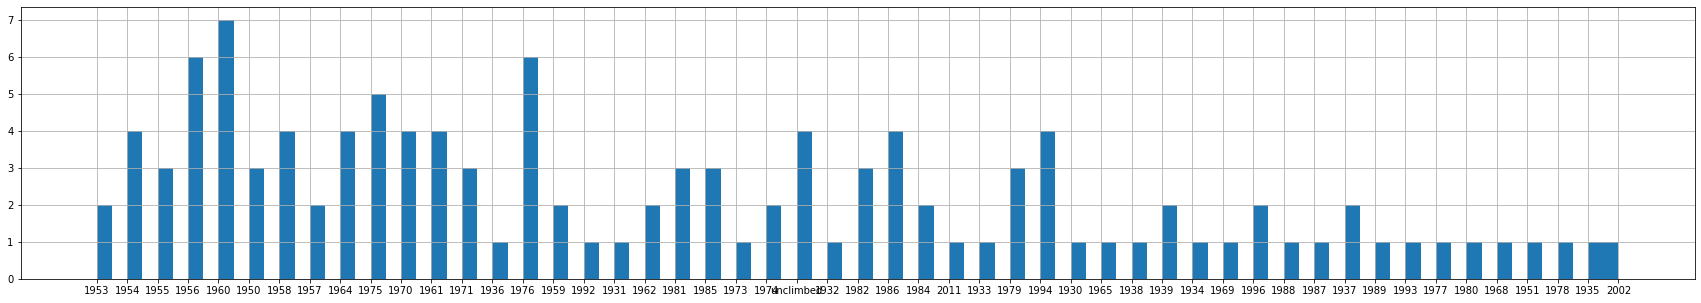

In [174]:
# распределение First ascent по годам
mount['First ascent'].hist(bins = 100, figsize = (30, 5));

In [175]:
def HightGroup( row ):
    """
    Простая функция отнесения высоты к группе
    """
    
    # проверяем, что значение высоты не равно NaN
    if not pd.isnull( row['Height (m)'] ):
        if row['Height (m)'] <= 7500:
            return 'High'

        if row['Height (m)'] <= 8000:
            return 'Very_high'

        return 'Extremaly_high'
    
    # если значение высоты NaN, то возвращаем 'High'
    return 'High'

In [176]:
mount['HightGroup'] = mount.apply( HightGroup, axis = 1 )
mount.head(10)

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,HightGroup
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0,Extremaly_high
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0,Extremaly_high
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0,Extremaly_high
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0,Extremaly_high
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0,Extremaly_high
5,6,Cho Oyu,8188,26864,2340,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28.0,Extremaly_high
6,7,Dhaulagiri I,8167,26795,3357,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39.0,Extremaly_high
7,8,Manaslu,8163,26781,3092,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45.0,Extremaly_high
8,9,Nanga Parbat,8126,26660,4608,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67.0,Extremaly_high
9,10,Annapurna I,8091,26545,2984,Annapurna Himalaya,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47.0,Extremaly_high


In [177]:
mount['HightGroup'].value_counts()

High              64
Very_high         40
Extremaly_high    14
Name: HightGroup, dtype: int64

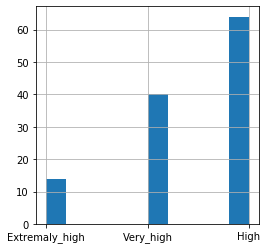

In [178]:
# распределение HightGroup по классификации высот
mount['HightGroup'].hist(bins = 10, figsize = (4, 4));

In [179]:
# отфильтровать и вывести только те горы, которые относятся к группе Extremaly high
mount[mount['HightGroup'].isin(['Extremaly_high'])]

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,HightGroup
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121.0,Extremaly_high
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0,Extremaly_high
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0,Extremaly_high
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0,Extremaly_high
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0,Extremaly_high
5,6,Cho Oyu,8188,26864,2340,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28.0,Extremaly_high
6,7,Dhaulagiri I,8167,26795,3357,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39.0,Extremaly_high
7,8,Manaslu,8163,26781,3092,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45.0,Extremaly_high
8,9,Nanga Parbat,8126,26660,4608,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67.0,Extremaly_high
9,10,Annapurna I,8091,26545,2984,Annapurna Himalaya,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47.0,Extremaly_high


In [180]:
# переводим значения столбца в категориальную переменную
mount['HightGroup'] = mount['HightGroup'].astype('category')

In [181]:
# исправление нулевой строки
mount['Ascents bef. 2004'][0] = 145

In [182]:
# поиск и исправление строки со значением Many
mount['Ascents bef. 2004'][mount[mount['Ascents bef. 2004'] == 'Many'].index] = 0


In [183]:
# заполнение пропущенных значений нулями
mount['Ascents bef. 2004'].fillna(0, inplace=True)

In [184]:
# перевод в категорию переменной int
mount['Ascents bef. 2004'] = mount['Ascents bef. 2004'].astype(int, errors = 'ignore')

In [185]:
# заполнение бывшего Many средним значением
mount['Ascents bef. 2004'][mount[mount['Ascents bef. 2004'] == 0].index] = int(mount['Ascents bef. 2004'].mean())

In [186]:
# бывшее значение Many
mount['Ascents bef. 2004'][47]

9

In [187]:
# пропущенные значения заменить средним
mount['Failed attempts bef. 2004'].fillna(mount['Failed attempts bef. 2004'].mean(), inplace=True)

In [188]:
# перевод в категорию переменной int
mount['Failed attempts bef. 2004'] = mount['Failed attempts bef. 2004'].astype(int)

In [189]:
# общее количество попыток покорить вершину
mount['Full_attempts'] = mount['Ascents bef. 2004'] + mount['Failed attempts bef. 2004']

In [190]:
mount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rank                       118 non-null    int64   
 1   Mountain                   118 non-null    object  
 2   Height (m)                 118 non-null    int64   
 3   Height (ft)                118 non-null    int64   
 4   Prominence (m)             118 non-null    int64   
 5   Range                      118 non-null    object  
 6   Coordinates                118 non-null    object  
 7   Parent mountain            117 non-null    object  
 8   First ascent               118 non-null    object  
 9   Ascents bef. 2004          118 non-null    int32   
 10  Failed attempts bef. 2004  118 non-null    int32   
 11  HightGroup                 118 non-null    category
 12  Full_attempts              118 non-null    int32   
dtypes: category(1), int32(3), int64(4),

In [191]:
# получаем индекс категориальной переменной
mount['HightGroup'].cat.categories

Index(['Extremaly_high', 'High', 'Very_high'], dtype='object')

In [192]:
mount

,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004,HightGroup,Full_attempts
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,145,121,Extremaly_high,266
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44,Extremaly_high,89
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24,Extremaly_high,62
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26,Extremaly_high,52
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52,Extremaly_high,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,105,Noijin Kangsang / Norin Kang,7206,23642,2160,Nagarze Himalaya,28°56′48″N 90°10′42″E﻿,Gangkar Puensum,1986,4,1,High,5
114,106,Langtang Ri,7205,23638,650,Langtang Himalaya,28°22′53″N 85°41′01″E﻿,Shisha Pangma,1981,4,0,High,4
115,107,Kangphu Kang,7204,23635,1200,Lunana Himalaya,28°09′20″N 90°03′48″E﻿,Tongshanjiabu,2002,1,0,High,1
116,108,Singhi Kangri,7202,23629,790,Siachen Karakoram,35°35′59″N 76°59′01″E﻿,Teram Kangri III,1976,2,0,High,2


In [193]:
# коэфициент корреляции Пирсона
mount.corr()

,Rank,Height (m),Height (ft),Prominence (m),Ascents bef. 2004,Failed attempts bef. 2004,Full_attempts
Rank,1.000000,-0.800126,-0.800115,-0.568135,-0.490133,-0.507477,-0.512704
Height (m),-0.800126,1.000000,1.000000,0.547900,0.700458,0.732929,0.736288
Height (ft),-0.800115,1.000000,1.000000,0.547860,0.700469,0.732927,0.736294
Prominence (m),-0.568135,0.547900,0.547860,1.000000,0.625520,0.666474,0.663077
Ascents bef. 2004,-0.490133,0.700458,0.700469,0.625520,1.000000,0.885604,0.976398
Failed attempts bef. 2004,-0.507477,0.732929,0.732927,0.666474,0.885604,1.000000,0.965011
Full_attempts,-0.512704,0.736288,0.736294,0.663077,0.976398,0.965011,1.000000


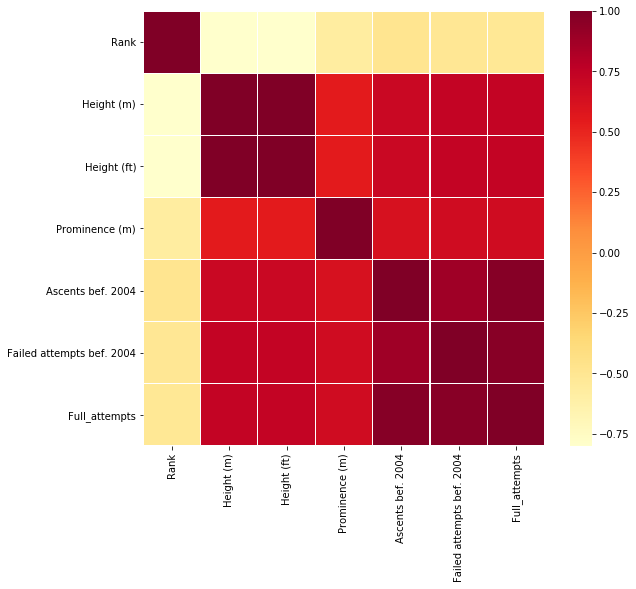

In [194]:
cm = mount.corr()

f, ax = plt.subplots(figsize =(9, 8))

sns.heatmap(cm, ax = ax, cmap ="YlOrRd", linewidths = 0.1);

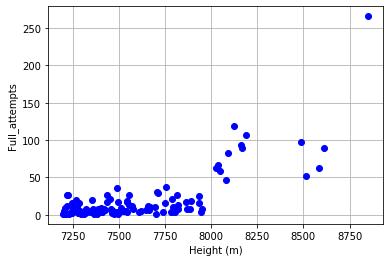

In [195]:
plt.plot(mount['Height (m)'], mount['Full_attempts'], 'bo')
plt.xlabel('Height (m)')
plt.ylabel('Full_attempts');
plt.grid()
plt.show();

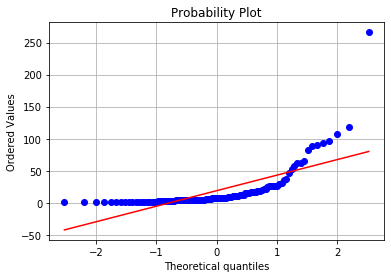

In [196]:
# проверим "нормальность" нашего распределения с помощью QQ-plot

stats.probplot(mount['Full_attempts'], dist="norm", plot=plt )
plt.grid();
plt.show()

In [197]:
# проверка на нормальность распределения

stat, p = stats.normaltest(mount['Full_attempts']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=141.194, p-value=0.000
Отклонить гипотезу о нормальности


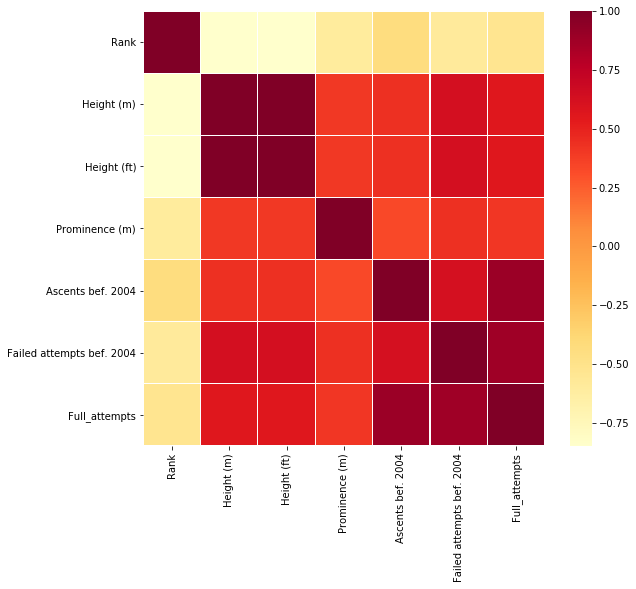

In [198]:
cm = mount.corr(method='spearman')

f, ax = plt.subplots(figsize =(9, 8))

sns.heatmap(cm, ax = ax, cmap ="YlOrRd", linewidths = 0.1);

In [199]:
mount.corr(method='spearman')

,Rank,Height (m),Height (ft),Prominence (m),Ascents bef. 2004,Failed attempts bef. 2004,Full_attempts
Rank,1.000000,-0.848334,-0.848334,-0.602316,-0.434323,-0.582499,-0.526126
Height (m),-0.848334,1.000000,1.000000,0.406779,0.437519,0.638002,0.562102
Height (ft),-0.848334,1.000000,1.000000,0.406779,0.437519,0.638002,0.562102
Prominence (m),-0.602316,0.406779,0.406779,1.000000,0.331309,0.437459,0.408600
Ascents bef. 2004,-0.434323,0.437519,0.437519,0.331309,1.000000,0.628987,0.898157
Failed attempts bef. 2004,-0.582499,0.638002,0.638002,0.437459,0.628987,1.000000,0.878174
Full_attempts,-0.526126,0.562102,0.562102,0.408600,0.898157,0.878174,1.000000
